### CUSTOMER CHURN PROJECT

The problem at hand is to analyze customer churn for a telecommunications company. The company is experiencing a high rate of customer churn, resulting in significant revenue loss. The dataset provided includes information about customers, such as demographics, service usage, contract details, and customer churn status. 

Customer churn is a major problem and one of the most important concerns for large companies especially in the telecom sector due to the direct effect on the revenue of the company. Research shows that acquiring a customer is 5 times more costlier than retaining one.

Companies are seeking to develop means and tools to predict potential churn customers. Hence, analysing factors that impact customer churn is important to take necessary actions to reduce this churn.

### Load the Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('customer_churn_dataset.csv')
df.head()

,customer_id,gender,age,marital_status,dependents,contract_type,internet_service,phone_service,multiple_lines,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn_status,call_duration_minutes,latitude,longitude
0,3850,Male,42,Married,3,Monthly,Fiber Optic,No,No,Yes,...,No,Yes,Yes,Yes,41.40,595.21,No,1062,-49.780269,-13.803970
1,4696,Female,76,Single,1,Yearly,DSL,No,Yes,Yes,...,No,Yes,Yes,No,46.20,940.05,No,901,56.553157,113.992914
2,5695,Female,39,Married,2,Monthly,Fiber Optic,Yes,No,Yes,...,No,No,Yes,No,43.05,919.62,No,928,80.762088,-27.906437
3,8712,Female,74,Single,3,Monthly,DSL,No,No,No,...,Yes,No,No,Yes,23.01,538.68,Yes,479,87.832819,86.922690
4,10506,Male,30,Married,3,Yearly,DSL,No,Yes,No,...,Yes,No,No,No,38.19,875.93,No,650,-88.373695,-29.320198


### Data Preprocessing

In [2]:
df.info() # Check the data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            500 non-null    int64  
 1   gender                 500 non-null    object 
 2   age                    500 non-null    int64  
 3   marital_status         500 non-null    object 
 4   dependents             500 non-null    int64  
 5   contract_type          500 non-null    object 
 6   internet_service       500 non-null    object 
 7   phone_service          500 non-null    object 
 8   multiple_lines         500 non-null    object 
 9   online_security        500 non-null    object 
 10  online_backup          500 non-null    object 
 11  device_protection      500 non-null    object 
 12  tech_support           500 non-null    object 
 13  streaming_tv           500 non-null    object 
 14  streaming_movies       500 non-null    object 
 15  monthl

In [3]:
df.isnull().sum() # here there is no null values and missing values.

customer_id              0
gender                   0
age                      0
marital_status           0
dependents               0
contract_type            0
internet_service         0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
monthly_charges          0
total_charges            0
churn_status             0
call_duration_minutes    0
latitude                 0
longitude                0
dtype: int64

In [4]:
df.nunique()  # finding the uniques values

customer_id              500
gender                     2
age                       60
marital_status             2
dependents                 4
contract_type              2
internet_service           2
phone_service              2
multiple_lines             2
online_security            2
online_backup              2
device_protection          2
tech_support               2
streaming_tv               2
streaming_movies           2
monthly_charges          484
total_charges            499
churn_status               2
call_duration_minutes    415
latitude                 500
longitude                500
dtype: int64

In [5]:
df.describe() 

,customer_id,age,dependents,monthly_charges,total_charges,call_duration_minutes,latitude,longitude
count,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,519770.864000,48.442000,1.5440,51.535580,523.183180,596.786000,0.915006,0.081410
std,288105.287058,17.458185,1.1343,29.383052,296.521689,336.445591,51.909861,100.505525
min,3850.000000,18.000000,0.0000,0.140000,2.570000,3.000000,-88.373695,-178.645120
25%,266212.000000,33.000000,1.0000,25.990000,277.372500,317.750000,-42.374942,-85.098356
50%,532085.000000,49.000000,2.0000,51.665000,543.750000,613.000000,-0.745630,2.257802
75%,769655.500000,63.000000,3.0000,77.942500,783.802500,864.250000,46.173488,84.043319
max,997121.000000,77.000000,3.0000,99.660000,999.570000,1198.000000,89.999598,178.067051


In [6]:
df.columns.values

array(['customer_id', 'gender', 'age', 'marital_status', 'dependents',
       'contract_type', 'internet_service', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'monthly_charges', 'total_charges',
       'churn_status', 'call_duration_minutes', 'latitude', 'longitude'],
      dtype=object)

### Exploratory Data Analysis (EDA) 

Conduct exploratory data analysis to understand the distribution of features and their relationship with the target variable (churn).
Visualize the data usig plot and pie chart, to identify patterns and correlations
.


In [7]:
# Churned Customers by Genders
df.churn_status[df.churn_status == 'No'].groupby(by = df.gender).count()

gender
Female    206
Male      189
Name: churn_status, dtype: int64

In [8]:
# Not Churn customers by Genders
df.churn_status[df.churn_status == 'Yes'].groupby(by = df.gender).count()

gender
Female    60
Male      45
Name: churn_status, dtype: int64

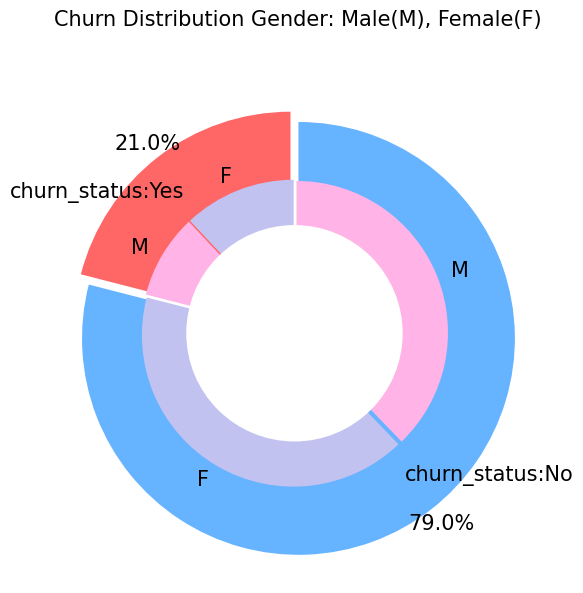

In [9]:
# Demography characteristics that differentiate churned customers from those who continue to be active

plt.figure(figsize = (6,6))
labels = ['churn_status:Yes', 'churn_status:No']
values = [105, 395]
labels_gender =['F','M','F','M']
sizes_gender =[60,45,206,189]
colors =['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [10]:
df[df["gender"]=="Male"][["internet_service", "churn_status"]].value_counts()

internet_service  churn_status
Fiber Optic       No              99
DSL               No              90
Fiber Optic       Yes             25
DSL               Yes             20
Name: count, dtype: int64

In [11]:
df[df["gender"]=="Female"][["internet_service", "churn_status"]].value_counts()

internet_service  churn_status
DSL               No              109
Fiber Optic       No               97
                  Yes              34
DSL               Yes              26
Name: count, dtype: int64

In [12]:
df[df["gender"]=="Male"][["marital_status", "churn_status"]].value_counts()

marital_status  churn_status
Married         No              95
Single          No              94
Married         Yes             23
Single          Yes             22
Name: count, dtype: int64

In [13]:
df[df["gender"]=="Female"][["marital_status", "churn_status"]].value_counts()

marital_status  churn_status
Married         No              104
Single          No              102
Married         Yes              31
Single          Yes              29
Name: count, dtype: int64

### Churn Customers with higher Monthly And Total charges

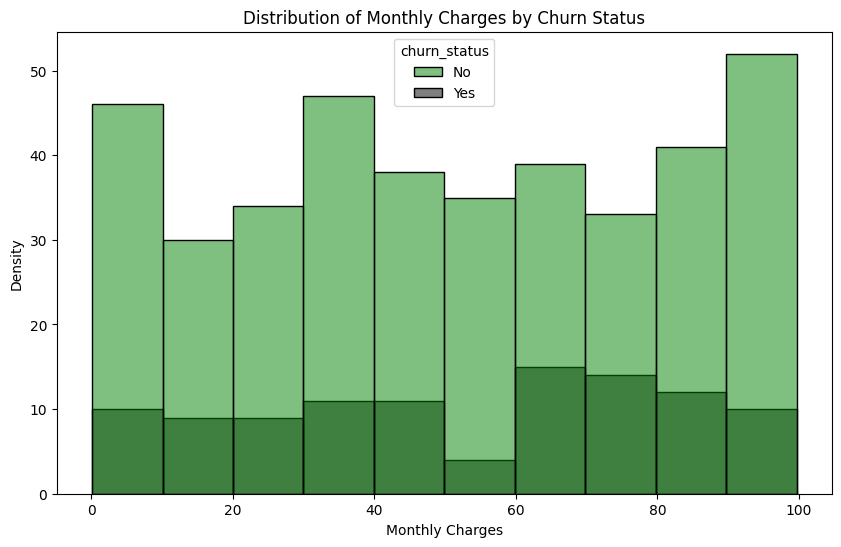

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms with overlapping densities
plt.figure(figsize=(10, 6))
sns.histplot(df, x='monthly_charges', hue='churn_status', fill=True, palette={"Yes": "black", "No": "green"})

# Set labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('Distribution of Monthly Charges by Churn Status')

# Show plot
plt.show()


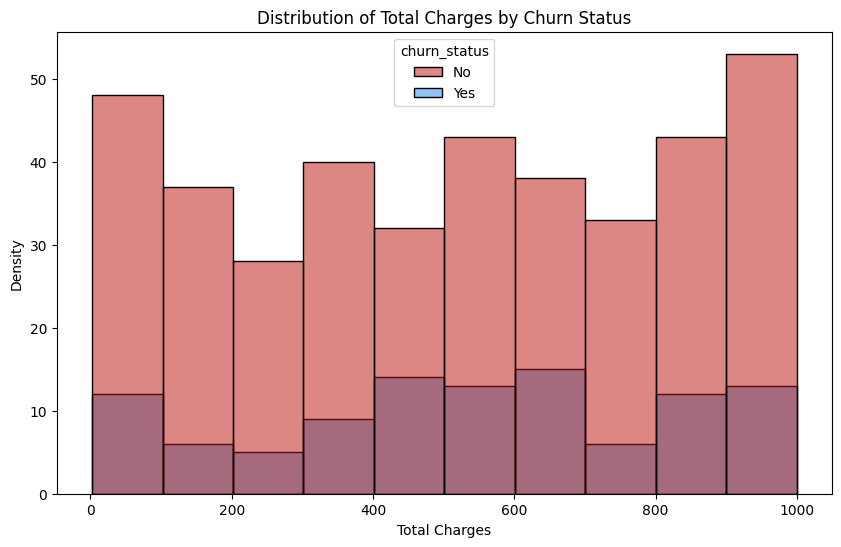

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms with overlapping densities
plt.figure(figsize=(10, 6))
sns.histplot(df, x='total_charges', hue='churn_status', fill=True, palette={"Yes": "#238bed", "No": "#bc110b"})

# Set labels and title
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('Distribution of Total Charges by Churn Status')

# Show plot
plt.show()



The analysis aims to investigate the relationship between various additional internet services (online security, online backup, device protection, tech support, streaming TV, and streaming movies) and customer churn. Each subplot in the visualization shows the percentage of churned customers versus retained customers for each service.

The bars represent the proportion of churned and retained customers who have opted for each additional service. This breakdown allows for a comparison of churn rates among customers with different combinations of additional services.

In [16]:
#Further spliting the data basis internet services for analysis of the additional services.
df_internet = df[df["internet_service"] != "No"]

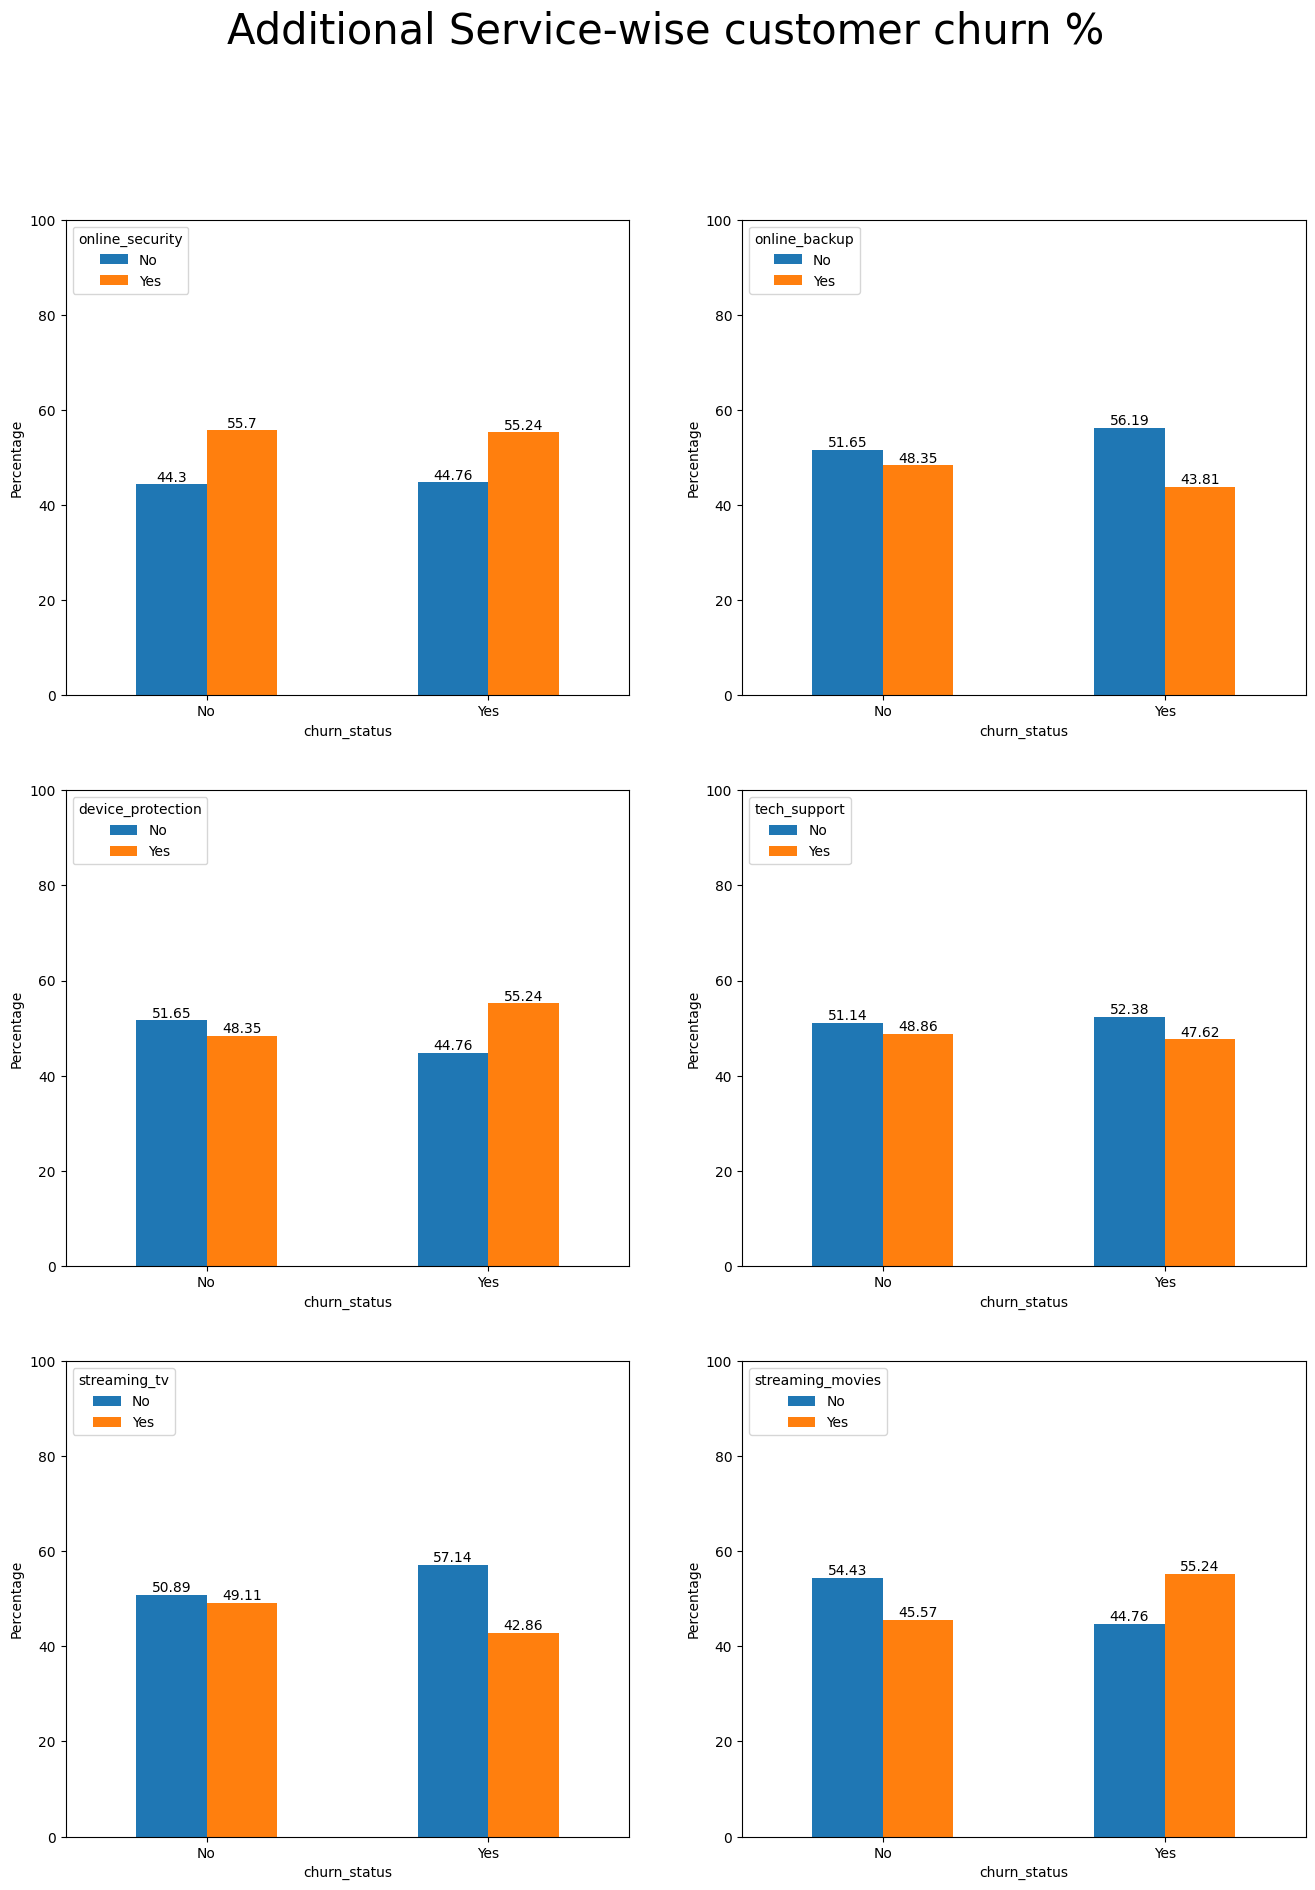

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(16, 21))

cols = ["online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies"]
col, row = 0, 0

fig.suptitle("Additional Service-wise customer churn %", fontsize=30)

for i in range(6):
    ax = (pd.crosstab(df_internet["churn_status"], df_internet[cols[i]], normalize="index")*100).round(2).plot.bar(rot=0, ylabel="Percentage", ylim=(0, 100), ax=axes[row, col])

    for container in ax.containers:
        ax.bar_label(container)

    ax.legend(loc='upper left', title=cols[i]);
    
    col += 1
    if i == 1:
        col, row = 0, 1
    elif i == 3:
        col, row = 0, 2

In [18]:
import pandas as pd

# Filter the DataFrame for churned customers (churn_status = 'Yes')
churned_customers = df[df['churn_status'] == 'Yes']

# Group the churned customers by age group and gender
churned_grouped = churned_customers.groupby(['age', 'gender']).size().reset_index(name='count')

# Print the churned customers by age group and gender
print("Churned Customers:")
print(churned_grouped)

# Filter the DataFrame for active customers (churn_status = 'No')
active_customers = df[df['churn_status'] == 'No']

# Group the active customers by age group and gender
active_grouped = active_customers.groupby(['age', 'gender']).size().reset_index(name='count')

# Print the active customers by age group and gender
print("\nActive Customers:")
print(active_grouped)


Churned Customers:
    age  gender  count
0    18    Male      2
1    19    Male      1
2    20    Male      1
3    21    Male      1
4    22  Female      1
..  ...     ...    ...
67   74  Female      2
68   74    Male      1
69   76  Female      3
70   76    Male      2
71   77  Female      3

[72 rows x 3 columns]

Active Customers:
     age  gender  count
0     18  Female      2
1     18    Male      3
2     19  Female      3
3     19    Male      4
4     20  Female      2
..   ...     ...    ...
110   75    Male      3
111   76  Female      3
112   76    Male      6
113   77  Female      2
114   77    Male      3

[115 rows x 3 columns]


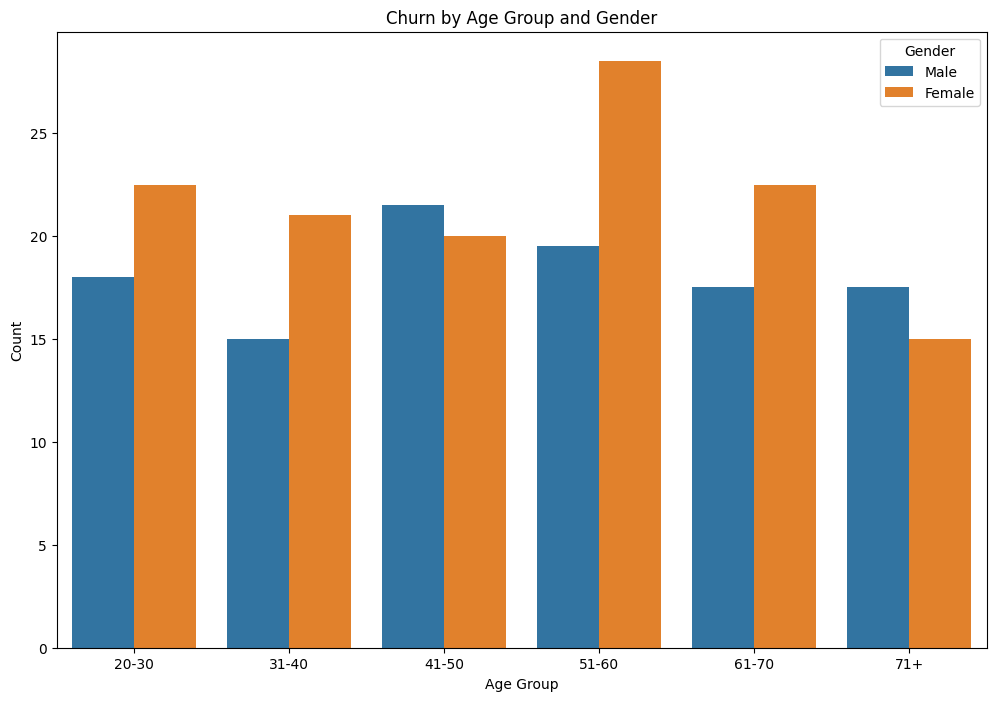

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the age bins
age_bins = [20, 30, 40, 50, 60, 70, float('inf')]
age_labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Add a new column 'age_group' to the DataFrame based on age bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)

# Filter the DataFrame for churned customers (churn_status = 'Yes')
churned_customers = df[df['churn_status'] == 'Yes']

# Group the churned customers by age group and gender
churned_grouped = churned_customers.groupby(['age_group', 'gender']).size().reset_index(name='count')

# Filter the DataFrame for active customers (churn_status = 'No')
active_customers = df[df['churn_status'] == 'No']

# Group the active customers by age group and gender
active_grouped = active_customers.groupby(['age_group', 'gender']).size().reset_index(name='count')

# Concatenate churned and active grouped data
combined_grouped = pd.concat([churned_grouped, active_grouped], keys=['Churned', 'Active'])

# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_grouped, x='age_group', y='count', hue='gender', hue_order=['Male', 'Female'], ci=None)
plt.title('Churn by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()



### Correlation with Numeric columns

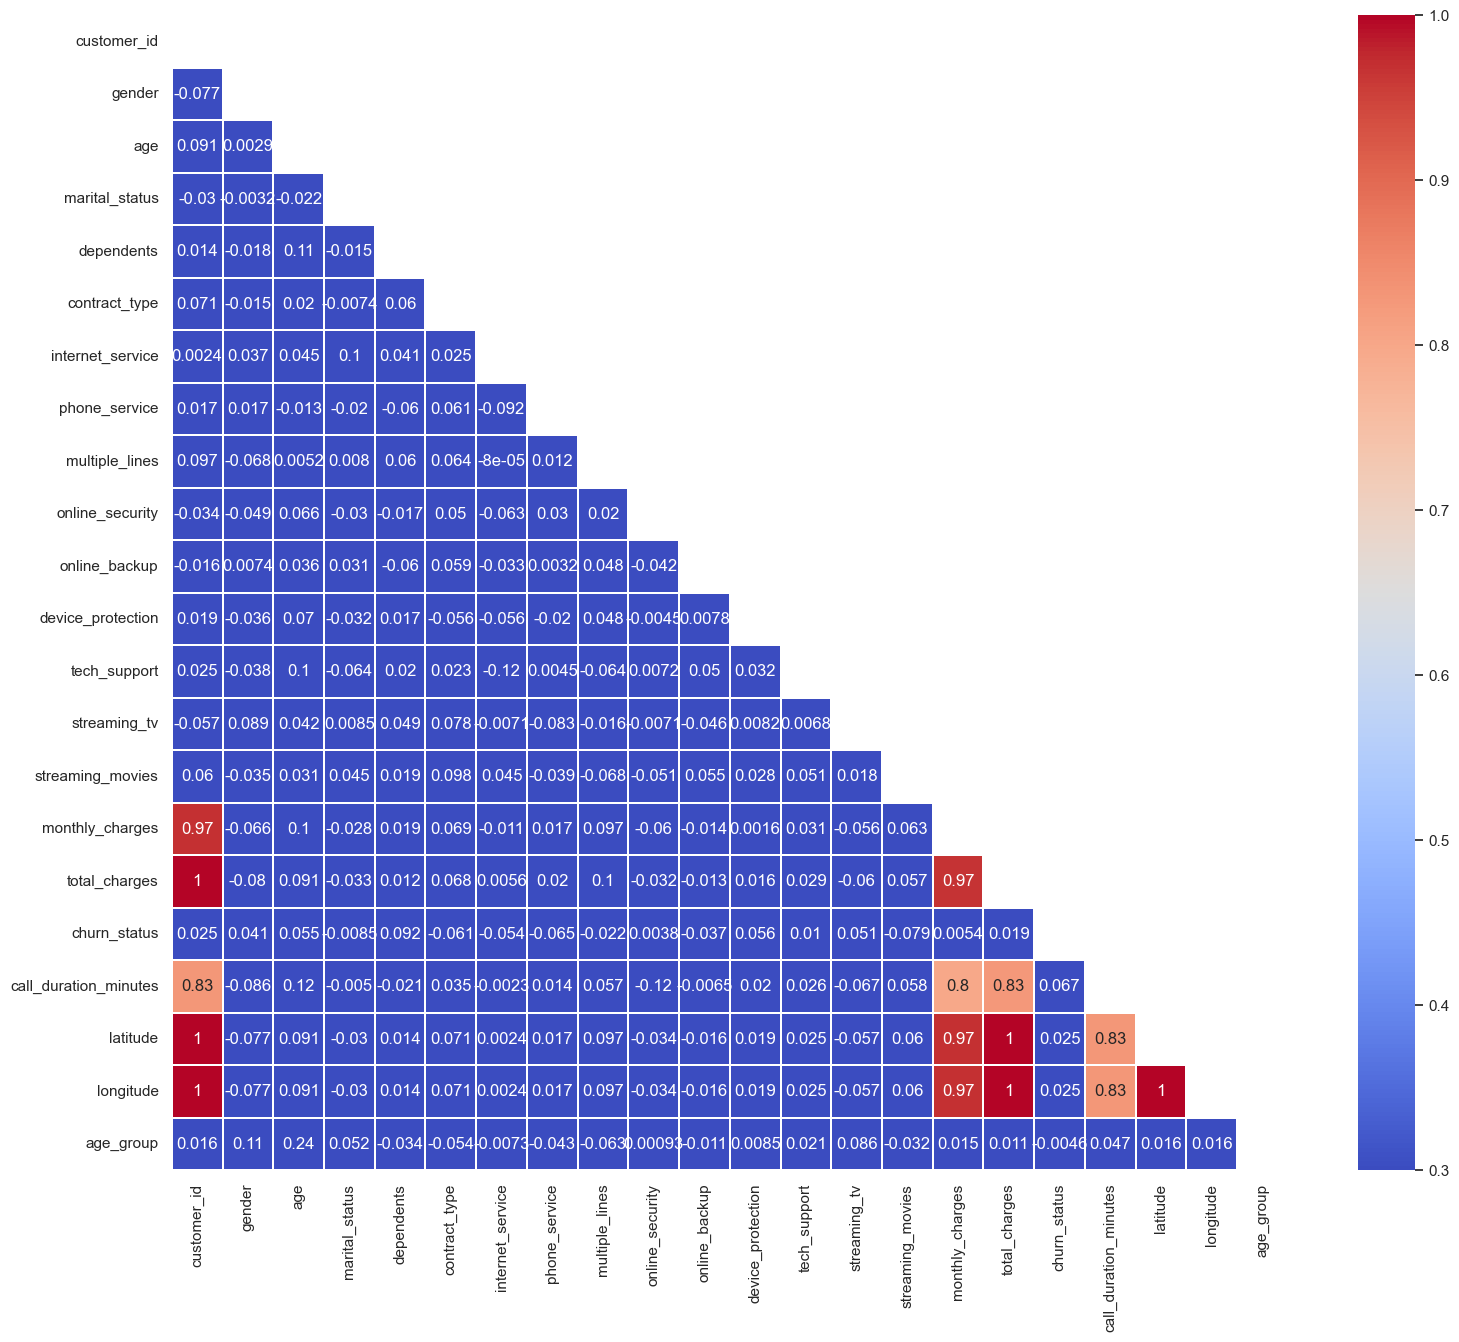

In [22]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

### Decision Tree 

Split the dataset into training and testing sets.
Choose appropriate machine learning models for classification (since churn prediction is typically a classification problem). Common models include logistic regression, decision treec
.
Train the models on the training data and evaluate their performance using metrics like accuracy, precision, recall F1 score.e,

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn import metrics

# Define the features (X) and the target variable (y)
X = df.drop(['churn_status'], axis=1)
y = df['churn_status']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

clf2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

clf3 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=2,min_samples_leaf=2)
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)


print('Accuracy M1:',metrics.accuracy_score(y_test,y_pred))
print('Accuracy M2:',metrics.accuracy_score(y_test,y_pred2))
print('Accuracy M3:',metrics.accuracy_score(y_test,y_pred3))


Accuracy M1: 0.68
Accuracy M2: 0.7866666666666666
Accuracy M3: 0.8266666666666667


<function matplotlib.pyplot.show(close=None, block=None)>

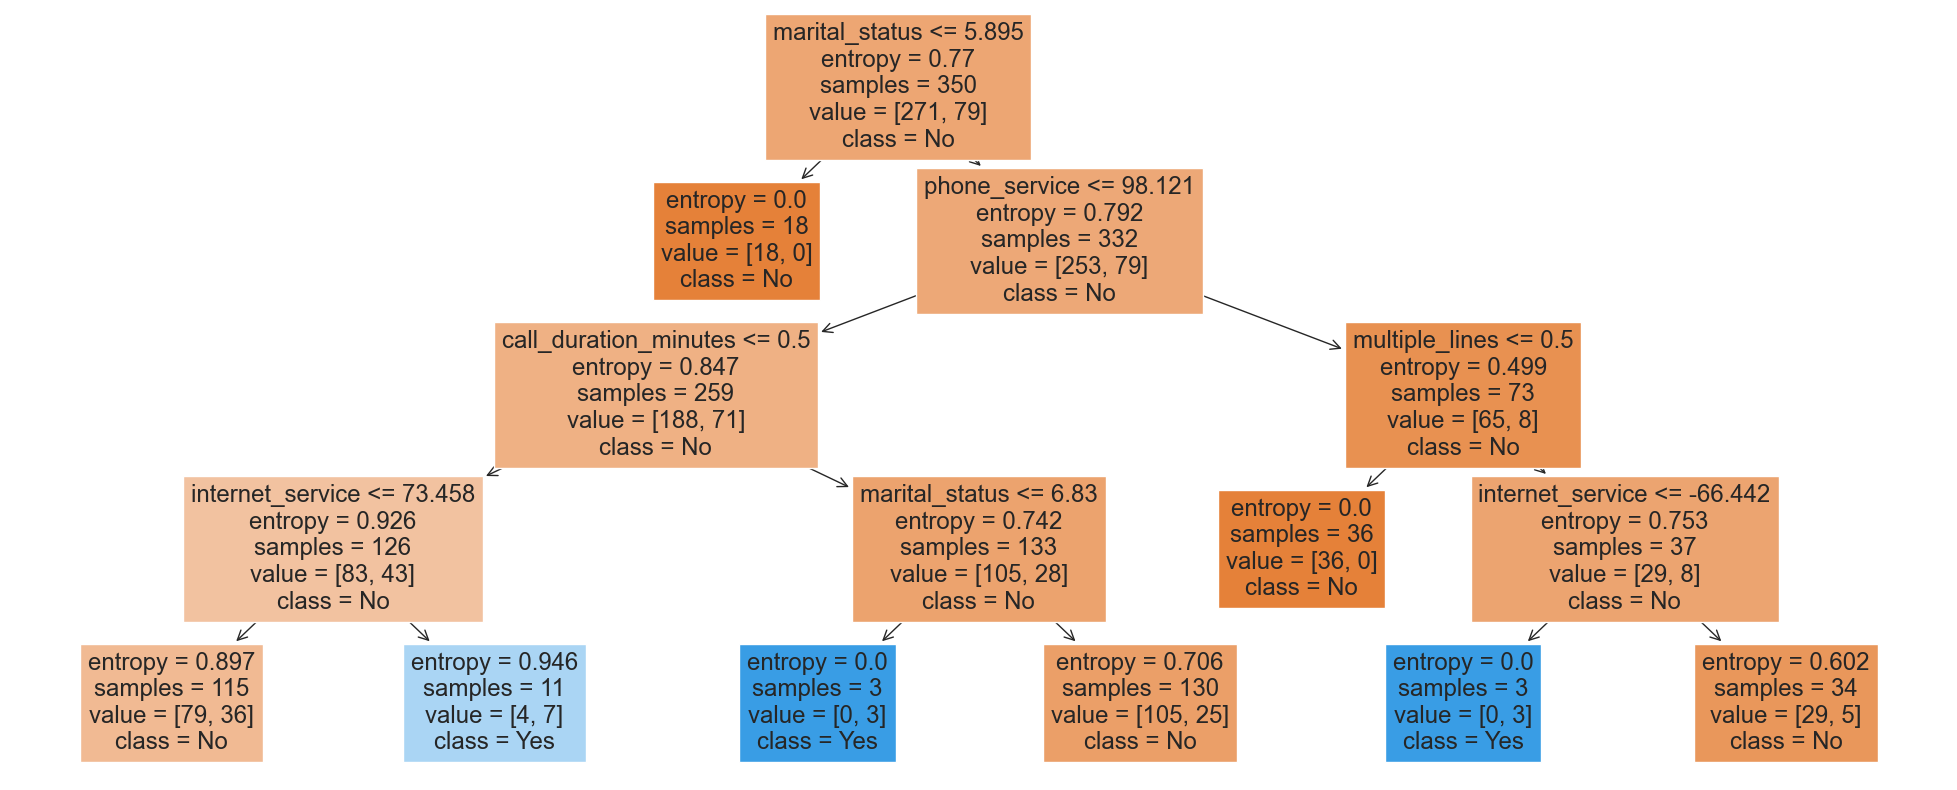

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plot_tree(clf2,class_names=['No','Yes'],feature_names=X.columns,filled=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

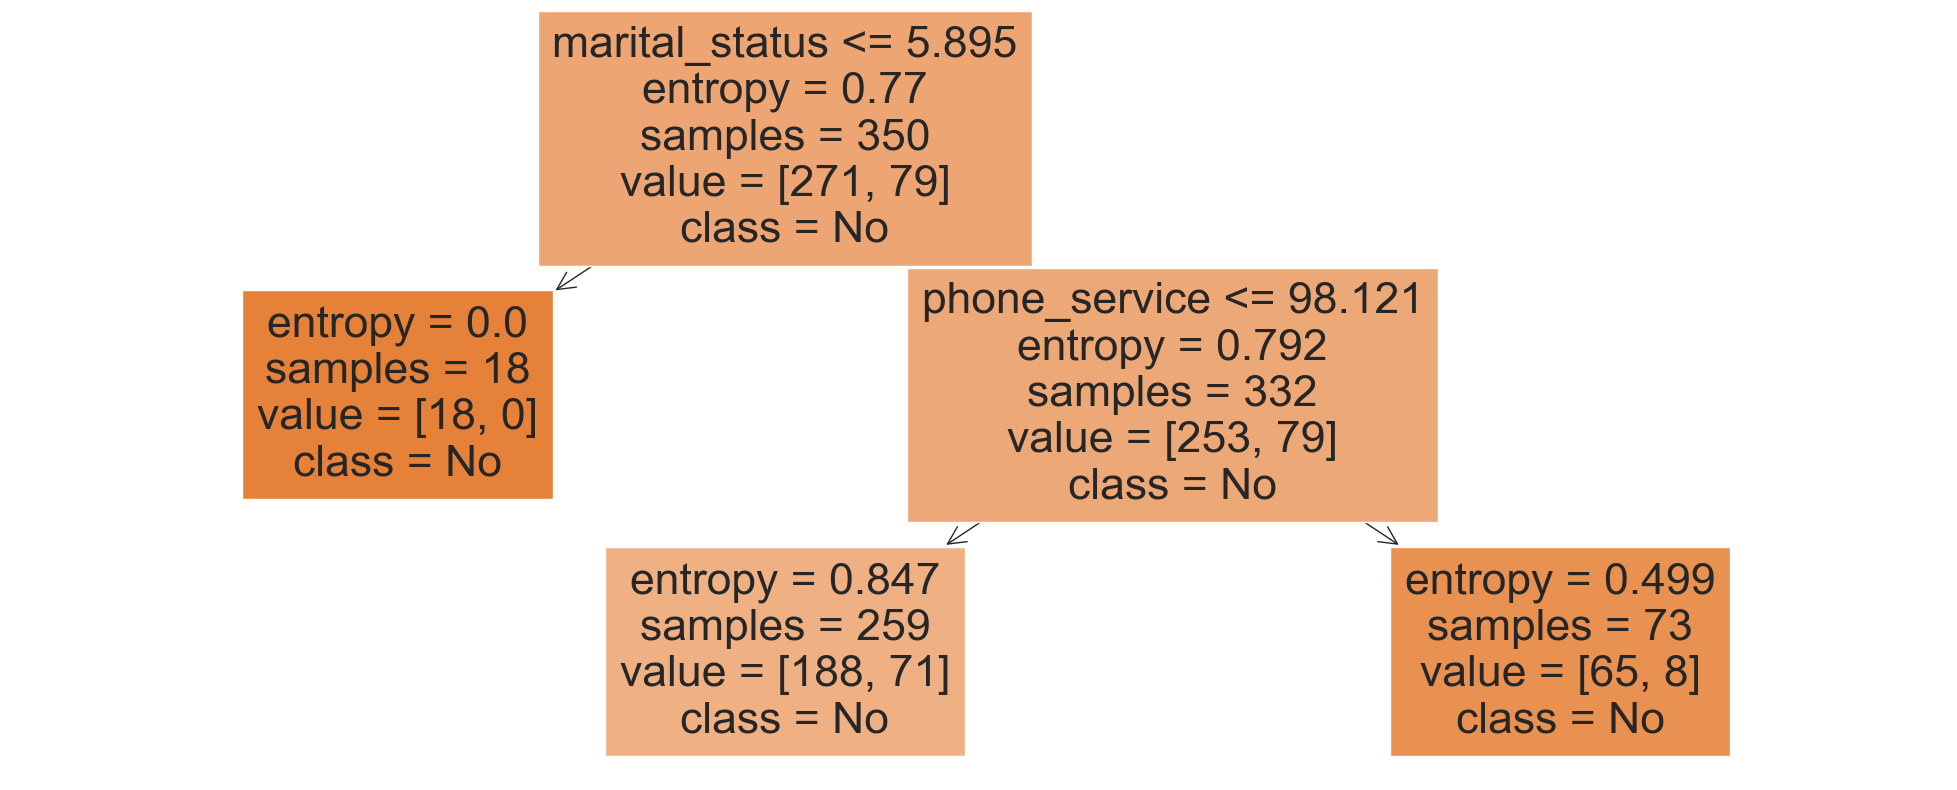

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plot_tree(clf3,class_names=['No','Yes'],feature_names=X.columns,filled=True)
plt.show

In [33]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       124
           1       0.18      0.23      0.20        26

    accuracy                           0.68       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.71      0.68      0.70       150

